# Physics-Based Scene Simulation: Visualization of reactive stepping body model

This notebook visualizes the balance dynamics of a two-legged standing body using an inverted pendulum model. 
It imports simulation data from `reactive_stepping_body.py` and generates an animated visualization. The figure maintains balance while standing and takes a reactive step if pushed beyond a stability threshold.

## Table of Contents
1. Approach
2. Equations of Motion
3. Notebook code for visualization

## 1. Approach

Use a PD controller to simulate reactive stepping behavior, where the body figure (inverted pendulum model) dynamically adjusts its foot placement to maintain balance when subjected to external disturbances. An explicit damping term is included to model the body's natural stabilization response.


## 2. Equations of Motion:

The dynamics of the reactive stepping model are described by the following equations:

$$
\tau = -K_p \theta - K_d \omega
$$

$$
\frac{d\omega}{dt} = \frac{\tau - c\, \omega}{m l^2}
$$

$$
\frac{d\theta}{dt} = \omega
$$

**Where:**

- $\tau$ is the control torque applied.
- $\theta$ is the angle of the body relative to vertical.
- $\omega$ is the angular velocity ($\frac{d\theta}{dt}$).
- $K_p, K_d$ are the proportional and derivative control gains.
- $c$ is the explicit damping coefficient (set as 0.2).
- $m$ is the mass.
- $l$ is the length of the pendulum (leg).


## 3. Notebook code for visualization

In [1]:
# Needed to see animation if using jupyter notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


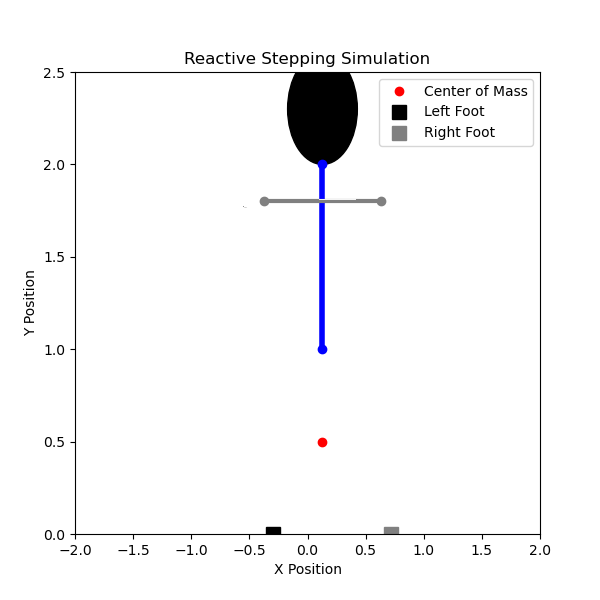

In [2]:
# Reactive Stepping Body Visualization

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sys
import os

# Add the path to your physics module (adjust if needed)
sys.path.append(os.path.abspath("../src/physics"))

from reactive_stepping_body import simulate_reactive_stepping_body

# Run the simulation
time, torso_x, torso_y, foot_positions, com_positions, step_events = simulate_reactive_stepping_body()

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(0, 2.5)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Reactive Stepping Simulation")

# Plot elements
torso_line, = ax.plot([], [], 'o-', lw=4, color='blue')
com_marker, = ax.plot([], [], 'ro', markersize=6, label='Center of Mass')
left_foot_marker, = ax.plot([], [], 's', color='black', markersize=10, label='Left Foot')
right_foot_marker, = ax.plot([], [], 's', color='gray', markersize=10, label='Right Foot')
step_text = ax.text(-1.5, 2.2, '', fontsize=10, color='darkred')

# Additional elements for head and arms
arm_line, = ax.plot([], [], 'o-', lw=3, color='gray')
head_radius = 0.3
head_circle = plt.Circle((0, 0), 0.3, color='black')
ax.add_patch(head_circle)

ax.legend()

def init():
    torso_line.set_data([], [])
    com_marker.set_data([], [])
    left_foot_marker.set_data([], [])
    right_foot_marker.set_data([], [])
    arm_line.set_data([], [])
    head_circle.center = (0, 0)
    step_text.set_text('')
    return torso_line, com_marker, left_foot_marker, right_foot_marker, arm_line, head_circle, step_text


def update(frame):
    # Foot positions
    lf_x, rf_x = foot_positions[frame]
    foot_y = 0

    # Center of mass (COM)
    com_x = com_positions[frame]
    com_y = 0.5

    # Torso position
    tx = torso_x[frame]
    ty = torso_y[frame]

    # Update visuals
    torso_line.set_data([com_x, tx], [foot_y + 1, ty])
    com_marker.set_data(com_x, com_y)
    left_foot_marker.set_data(lf_x, foot_y)
    right_foot_marker.set_data(rf_x, foot_y)
    
    # Compute shoulder position (a bit below torso top)
    x_shoulder = tx
    y_shoulder = ty - 0.2

    # Arms stretch horizontally from shoulder
    arm_span = 1.0  
    arm_x = [x_shoulder - arm_span / 2, x_shoulder + arm_span / 2]
    arm_y = [y_shoulder, y_shoulder]

    # Head (above shoulder)
    head_radius = 0.3
    x_head = x_shoulder
    y_head = y_shoulder + head_radius + 0.2
    head_circle.center = (x_head, y_head)


    arm_line.set_data(arm_x, arm_y)

    # Step event text
    if frame in step_events:
        step_text.set_text(f"Step triggered at t = {time[frame]:.2f}s")
    else:
        step_text.set_text("")

    return torso_line, com_marker, left_foot_marker, right_foot_marker, arm_line, head_circle, step_text


ani = animation.FuncAnimation(
    fig, update, frames=len(time), init_func=init,
    blit=True, interval=20
)

ani.save("reactive_stepping.mp4", writer="ffmpeg", fps=60)
plt.show()


In the animation, the body balances itself using PD controller, and then, an external force (push) is applied, requiring the body to take a step to regain balance. It still needs some tuning but the core function is there. Also, legs visualization will be added in the future. 